In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
% matplotlib inline

# Quelques fonctions utilitaires

## I A

In [3]:
[1,2,3] + [4,5,6]

[1, 2, 3, 4, 5, 6]

In [4]:
2*[1, 2, 3]

[1, 2, 3, 1, 2, 3]

## I B

In [5]:
def smul(k, t):
    return [k*e for e in t]

In [6]:
smul(2, [1,2,3])

[2, 4, 6]

## I C

In [7]:
def vsom(t1, t2):
    return [e1 + e2 for (e1, e2) in zip(t1, t2)]

In [8]:
vsom([1,2,3], [4,5,6])

[5, 7, 9]

In [9]:
def vdiff(t1, t2):
    return [e1 - e2 for (e1, e2) in zip(t1, t2)]

In [10]:
vdiff([1,2,3], [4,5,6])

[-3, -3, -3]

# Étude de schémas numériques

## II A Mise en forme du problème

$(S)\begin{cases}  y'(t) = z(t) \\ z'(t) = f(y(t)) \end{cases}$

\begin{align*}
y(t_{i+1}) - y(t_{i}) &= \int_{t_{i}}^{t_{i+1}} \, y'(t) \, \text{d}t \\
y(t_{i+1}) - y(t_{i}) &= \int_{t_{i}}^{t_{i+1}} \, z(t) \, \text{d}t
\end{align*}

\begin{align*}
z(t_{i+1}) - z(t_{i}) &= \int_{t_{i}}^{t_{i+1}} \, z'(t) \, \text{d}t \\
z(t_{i+1}) - z(t_{i}) &= \int_{t_{i}}^{t_{i+1}} \, y''(t) \, \text{d}t \\
z(t_{i+1}) - z(t_{i}) &= \int_{t_{i}}^{t_{i+1}} \, f(y(t)) \, \text{d}t 
\end{align*}

## II B Schéma d'Euler explicite

$\begin{cases}
y_{0} = y(t_{min}) \\
y_ {i+1}=y_{i}+hz_{i}
\end{cases}
$

$\begin{cases}
z_{0} = y'(t_{min}) \\
z_ {i+1}=z_{i}+hf(y_{i})
\end{cases}
$

In [11]:
def euler(f, n , tmin, tmax, ytmin, yptmin):
    h  = (tmax - tmin)/(n - 1)
    ypreced = ytmin
    zpreced = yptmin
    yy = [ypreced]
    zz = [zpreced]
    for k in range(n - 1):
        (ynouveau, znouveau) = (ypreced + h*zpreced, zpreced + h*f(ypreced))
        yy.append(ynouveau)
        zz.append(znouveau)
        (ypreced, zpreced) = (ynouveau, znouveau)
    return (yy, zz)

On considère l'équation différentielle :
\begin{equation*}
y''(t) = - \omega^2y(t)
\end{equation*}

On en déduit que :
\begin{equation*}
(y'(t))^{2}+\omega^{2}y^{2}(t)=E=(y'(0))^{2}+\omega^{2}y^{2}(0)
\end{equation*}

\begin{align*}
E_{i+1}-E_{i} &= z_{i+1}^{2}+ \omega^{2}y_{i+1}^{2} - z_{i}^{2}- \omega^{2}y_{i}^{2} \\
E_{i+1}-E_{i} &= (z_{i}-h\omega^{2}y_{i})^{2}+ \omega^{2}(y_{i}+hz_{i})^{2} - z_{i}^{2}- \omega^{2}y_{i}^{2} \\
E_{i+1}-E_{i} &= -2hz_{i}\omega^{2}y_{i}+h^{2}\omega^{4}y_{i}^{2}+ 2 \omega^{2}hy_{i}z_{i}+\omega^{2}h^{2}z_{i}^{2} \\
E_{i+1}-E_{i} &= h^{2}\omega^{2} (z_{i}^{2} + \omega^{2}y_{i}^{2}) \\
E_{i+1}-E_{i} &= h^{2}\omega^{2} E_{i}^{2}
\end{align*}

 Un schéma numérique qui satisfait à la conservation de $E$ serait tel que pour tout $i \in J_{n}, \, E_{i+1}-E_{i}=0$.
 
 Pour le schéma d'Euler explicite, c'est impossible car on aurait pour tout $i \in J_{n}$, $E_{i}=0$ d'après l'égalité précédente c'est-à-dire $y_{i}=0$ et $z_{i}=0$, ce qui est absurde.
 
 En portant les valeurs d $y_{i}$ sur l'axe des abscisses et de $z_{i}$ sur l'axe des ordonnées, le graphe d'un schéma respectant la conservation de $E$ serait tel que $z(t)^2+\omega^{2}y^{2}(t)=E$ et ce serait l'équation d'une ellipse. 

In [24]:
yy, zz = euler(lambda y : -(2*np.pi)**2*y, 100, 0, 3, 3, 0)
print(yy[-3:], zz[-3:])

[13.933084621185467, 15.745054071756226, 17.051921471645617] [59.79499186883504, 43.12662419634988, 24.290569049441377]


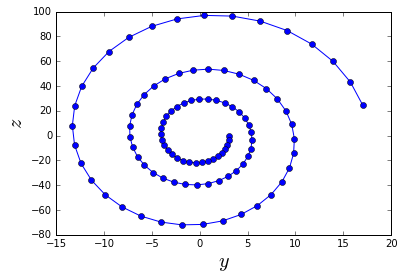

In [28]:
plt.plot(yy, zz, marker='o')
plt.xlabel(r'$y$', fontsize=20)
plt.ylabel(r'$z$', fontsize=20)

Des relations de récurrence :

$\begin{cases}
y_{0} = y(t_{min}) \\
y_ {i+1}=y_{i}+hz_{i}
\end{cases}
$

et

$\begin{cases}
z_{0} = y'(t_{min}) \\
z_ {i+1}=z_{i}-h\omega^{2}y_{i}
\end{cases}
$

on déduit que  $y_{i}>0 \Leftrightarrow z_{i+1}<z_{i}$ et  $z_{i}>0 \Leftrightarrow y_{i+1} > y_{i}$, ce qui explique la périodicité du graphe qui est en spirale.

Par ailleurs $E_{i+1}-E_{i} = h^{2}\omega^{2} E_{i}^{2}$ avec $E_{i}>0$ par conséquent la suite $(E_{i})$ est strictement croissante ainsi la suite $(z_{i}^2+\omega^{2}y_{i}^{2})$ est strictement croissante ce qui se traduit par une divergence de la spirale (la ditance du  point de coordonnées $(\omega y_{i}, z_{i})$ à l'origine tend vers $+\infty$ donc celle de $(y_{i}, z_{i})$ à l'origine tend vers $+\infty$ également puisque la multiplication par $\omega$ de $y_{i}$ correspond simplement à une dilatation selon l'axe des abscisses).
De plus lorsque $y'(t_{i}) \approx z_{i}$ est positif alors $y_{i} \approx y(t_{i})$ augmente et lorsque $y'(t_{i}) \approx z_{i}$ est négatif alors $y_{i} \approx y(t_{i})$ diminue.

## II C Schéma de Verlet

\begin{equation*}
y_{i+1}=y_{i}+hz_{i}+\frac{h^2}{2}f_{i} \text{ avec } f_{i}=f(y_{i})
\end{equation*}

\begin{equation*}
y_{i+1}=y_{i}(1-\frac{\omega^{2}h^2}{2})+hz_{i}
\end{equation*}

\begin{equation*}
z_{i+1}=z_{i}-\frac{h\omega^{2}}{2}(y_{i} + y_{i+1}) \end{equation*}

\begin{equation*}
z_{i+1}=z_{i}-\frac{h\omega^{2}}{2}(y_{i}(2-\frac{\omega^{2}h^2}{2})+hz_{i}) \end{equation*}

In [13]:
def verlet(f, n , tmin, tmax, ytmin, yptmin):
    h  = (tmax - tmin)/(n - 1)
    ypreced = ytmin
    zpreced = yptmin
    fpreced = f(ypreced)
    yy = [ypreced]
    zz = [zpreced]
    for k in range(n - 1):
        ynouveau = ypreced + h*zpreced + h**2/2*fpreced
        fnouveau = f(ynouveau)
        znouveau = zpreced + h/2*(fnouveau + fpreced)
        yy.append(ynouveau)
        zz.append(znouveau)
        (ypreced, zpreced, fpreced) = (ynouveau, znouveau, fnouveau)
    return (yy, zz)

In [29]:
yy, zz = verlet(lambda y : -(2*np.pi)**2*y, 100, 0, 3, 3, 0)
print(yy[-3:], zz[-3:])

[2.8152395363671467, 2.9606719372849324, 2.998774087394971] [6.483226837453586, 3.028320091959096, -0.5363692846006165]


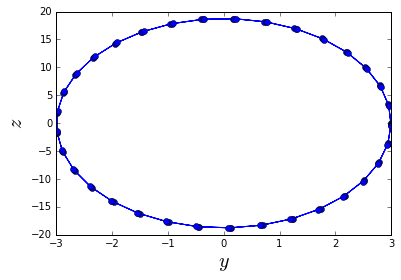

In [30]:
plt.plot(yy, zz, marker='o')
plt.xlabel(r'$y$', fontsize=20)
plt.ylabel(r'$z$', fontsize=20)

Dans le schéma de Verlet on a :


\begin{align*}
E_{i+1}-E_{i} &= z_{i+1}^{2}+ \omega^{2}y_{i+1}^{2} - z_{i}^{2}- \omega^{2}y_{i}^{2} \\
E_{i+1}-E_{i} &= (z_{i}-\frac{h\omega^{2}}{2}(y_{i}(2-\frac{\omega^{2}h^2}{2})+hz_{i}))^2 + \omega^{2} (y_{i}(1-\frac{\omega^{2}h^2}{2})+hz_{i})^2 -z_{i}^{2}- \omega^{2}y_{i}^{2}\\
E_{i+1}-E_{i} &= (z_{i}(1-\frac{h^2\omega^2}{2})+y_{i}(\frac{\omega^{4}h^3}{4}-h\omega^{2}))^2 + \omega^{2} (y_{i}(1-\frac{\omega^{2}h^2}{2})+hz_{i})^2 -z_{i}^{2}- \omega^{2}y_{i}^{2}\\
E_{i+1}-E_{i} &=-\frac{1}{4}y_{i}^{2}h^4\omega^{6} + y_{i}^{2}h^{6}\frac{\omega^8}{16}+z_{i}^2h^{4}\frac{\omega^{4}}{4}+2z_{i}y_{i}(1-\frac{h^2\omega^{2}}{2})\frac{\omega^{4}h^{3}}{4}
\end{align*}

On en déduit que pour le schéma de Verlet on a pour tout $i \in J_{n}, \, E_{i+1}-E_{i}=O(h^3)$
    

Le graphe du schéma numérique de Verlet est beaucoup plus proche de l'ellipse attendue, d'équation $(y'(t))^{2}+\omega^{2}y^{2}(t)=E$, qui traduit la conservation de l'énergie pour la solution théorique de l'équation différentielle $\forall t \in I, \, y''(t)=-\omega^{2}y(t)$.

On en déduit que le schéma de Verlet traduit la mieux la conservation de l'énergie que le schéma d'Euler (car pour tout $i \in J_{n}, \, E_{i+1}-E_{i}=O(h^3)$) et que c'est un schéma d'intégration plus précis.

# Problème à $N$ corps

## III Position du problème

Force exercée sur le corps $P_{j}$ par l'ensemble des autres corps $P_{k}$ avec $k \neq j$

\begin{align*}
\overrightarrow{F_{j}} &= \sum_{k\neq j}\overrightarrow{F_{k/j}} \\
\overrightarrow{F_{j}} &= \sum_{k\neq j}G\frac{m_{j}m_{k}}{r_{jk}^{3}}\overrightarrow{P_{j}P_{k}}
\end{align*}

In [15]:
G = 6.67*10**(-11)

def vect(p1, p2):
    return [c2 - c1 for (c1, c2) in zip((p1, p2))]

def msvect(k, vect):
    return [k*c for c in vect]

def norme_euclidienne(v):
    return math.sqrt([c**2 for c in v])

def force2(m1, p1, m2, p2):
    v12 = vect(p1, p2)
    n12 = norme_euclidienne(v12)
    k = G*m1*m2/n12**3
    return msvect(k, v12)
    

In [16]:
def somme_vect(v1, v2):
    """Retourne la somme de deux vecteurs"""
    return [e1 + e2 for (e1, e2) in zip(v1, v2)]

def somme_list_vect(listvect):
    """Retourne la somme d'une liste de vecteurs"""
    if len(listvect) == 1:
        return listvect[0]
    dernier = listvect.pop()
    listvect[-1] = somme_vect(listvect[-1], dernier)
    return somme_list_vect(listvect)

def forceN(j, m, pos):
    """Prend en parametre l'indice j du corps sur lequel s'exerce
    la force, la liste m des masses des N corps, la liste pos des positions
    et retourne le vecteur force Fj exercé par tous les autres corps
    sur le corps j"""
    (mj, pj) = (m[j], pos[j])
    ff = [force2(mj, pj, mk, pk) for (mk, pk) in zip(m, pos) if k != j]
    return somme_list_vect(ff)

In [17]:
somme_list_vect([[0,1,2],[-1,4,5],[-2,3,3]])

[-3, 8, 10]

## Approche numérique

`position[i]` est une liste de  $N$ listes à 3 éléments représentant les composantes des vecteurs de position des $N$ objets à l'instant `j`.

`vitess[i]` est une liste de  $N$ listes à 3 éléments représentant les composantes des vecteurs de vitess des $N$ objets à l'instant `i`.


On note $\overrightarrow{P(t)}(x(t), y(t), z(t))$ le vecteur position d'un corps $j$ de massse $m_{j}$  à l'instant t

 $\overrightarrow{P_{j}(t)}$ vérifie l'équation différentielle du second ordre :
 
\begin{equation*}
 m_{j}\overrightarrow{P_{j}}''(t)=\overrightarrow{F_{j}}(t)
\end{equation*}

La fonction $f: y(t) \mapsto f(y(t))$ du schéma de Verlet est  :

\begin{equation*}
t \mapsto \frac{1}{m_{j}}\overrightarrow{F_{j}}(t)
\end{equation*}

In [18]:
def pos_suiv(m, pos, vit, h):
    """Retourne la liste des positions des N corps  à l'instant suivant
    en utilisant le schéma de Verlet.
    Variante par rapport à celle demandée dans l'énoncé."""
    fpreced = [0]*N
    for j in range(N):
        (mj, pj, vj) = (m[j], pos[j], vit[j])
        fj = msvect(1/mj, forceN(j, m, pos))
        pos[j] = [ pjc + h*vjc + h**2/2*fjc for (pjc, vjc, fjc) in zip(pj, vj, fj)]
    return (pos, frepreced)

In [19]:
def etat_suiv(m, pos, vit, h):
    """Retourne les listes des positions et des vitesses des N corps  à l'instant suivant
    en utilisant le schéma de Verlet."""
    fpreced = [0]*N
    for j in range(N):
        (mj, pj, vj) = (m[j], pos[j], vit[j])
        fj = msvect(mj, forceN(j, m, pos))
        pos[j] = [ pjc + h*vjc + h**2/2*fjc for (pjc, vjc, fjc) in zip(pj, vj, fj)]
        fpreced[j] = fj
    #attention on utilise f(j+1) dans le calcul de z(i+1) la vitesse
    # à l'instant suivant qui dépend des valeurs des positions 
    # à l'instant j + 1 des N corps
    for j in range(N):
        fj2 = msvect(1/mj, forceN(j, m, pos))
        vit[j] = vit[j] + h/2*(fpreced[j] + fj2)
    return (pos, vit)

def etat_suiv2(m, pos, vit, h):
    """Retourne les listes des positions et des vitesses des N corps  à l'instant suivant
    en utilisant le schéma de Verlet."""
    (pos, fpreced) = pos_suiv(m, pos, vit, h)
    #attention on utilise f(j+1) dans le calcul de z(i+1) la vitesse
    # à l'instant suivant qui dépend des valeurs des positions 
    # à l'instant j + 1 des N corps
    for j in range(N):
        fj2 = msvect(1/mj, forceN(j, m, pos))
        vit[j] = vit[j] + h/2*(fpreced[j] + fj2)
    return (pos, vit)

D'après le graphique on peut conjecturer que :
\begin{equation*}
\ln(\tau_{N})=2 \ln(N) + b
\end{equation*}

On peut donc conjecturer que la complexité temporelle de la fonction `eta_suiv` est quadratique :
\begin{equation*}
 \tau_{N}=\text{e}^{b}N^{2}   
\end{equation*}

La complexité temporelle de la fonction `etat_suiv` est en $O(N^2)$ car elle comporte deux boucles de $N$ itérations avec dans chacune une boucle de $N -1$ itérations pour le calcul de la résultant des forces exercée par les $N-1$ autres corps.

C'est cohérent avec le résulat obtenu à la question III.B.4

# Exploitation d'une base de données

Requête SQL qui renvoie la liste des masses de tous les corps étudiés :

    SELECT masse FROM corps

Requête SQL qui renvoie le nombre de corps qui ont au moins un état connu antérieur à tmin() :

    SELECT COUNT(DISTINCT idcorps) FROM etat WHERE datem < tmin()

Requête SQL qui renvoie, pour chaque corps, son identifiant et la date de son dernier état antérieur à tmin() :
    
    SELECT corps.id_corps, corps, MAX(datem)
    FROM corps JOIN etat ON corps.id_corps = etat.id_corps
    WHERE datem < tmin()
    GROUP BY etat.id_corps
  
  

Requête SQL qui renvoie la masse et l’état initial (sous la forme masse, x, y, z, vx, vy, vz) de
chaque corps retenu pour participer à la simulation. Classez les corps dans l’ordre croissant par rapport à leur
distance à l’origine du référentiel :

    SELECT corps.id_corps, nom, masse, x, y, z, vx, vy, vz  FROM corps JOIN etat JOIN date_mesure ON corps.id_corps = etat.id_corps AND etat.id_corps = date_mesure.id_corps AND datem = date_der
    WHERE masse >= masse_min() 
    AND ABS(x) < arete()/2
    AND ABS(y) < arete()/2
    AND ABS(z) < arete()/2
    ORDER BY (x*x + y*y + z*z) ASC

In [20]:
#conversion d'une unité astronomique en m
au = 1.5*10**11

def simulation_verlet(p0, v0, masse, deltat, n):
    #conversion des vitesses initiales de km/s en  m/s
    vo = [msvect(10**3, v) for v in vo]
    #conversion des positions d'unités astronomiques en metres
    p0 = [msvect(au, p) for p in p0]
    (pos, vit) = (p0, v0)
    h = deltat
    for k in range(n):
        (pos, vit) = etat_suiv(masse, pos, vit, deltat)
    return [msvect(1/au, p) for p in pos]